# 패키지 로딩

In [1]:
import numpy as np
import pandas as pd
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

# 데이터 로딩

In [43]:
temp=pd.read_csv("2차 모델 데이터_수요 + 공급.csv")
temp["Date"] = pd.to_datetime(temp["Date"])
temp.index = temp["Date"]
temp.drop("Date", axis = 1, inplace= True)

temp["D-S"] = temp["Demand"] - temp["Supply"]

In [2]:
공급_ = pd.read_csv("구리 공급 변수모음.csv")
공급_.index = pd.date_range("2000-01-01","2023-01-01", freq="M")
공급_ = 공급_.drop("Period", axis = 1)

MOVING_MEAN = 공급_["PX_LAST"].mean(axis=0)
MOVING_STD = 공급_["PX_LAST"].std(axis=0)

공급_["PX_LAST_STD"] = (공급_["PX_LAST"] - MOVING_MEAN) / MOVING_STD
공급_["PX_LAST_STD_EWM"] = 공급_["PX_LAST_STD"].ewm(span=9, adjust=False).mean()
공급_["PX_LAST_EWM"] = 공급_["PX_LAST"].ewm(span=9, adjust=False).mean()
공급_

,Copper price,Cash Costs,Total tonnage transported,Total(MT),Oil Price (Dollars per Barrel),Mining GDP,PX_LAST,PX_LAST_STD,PX_LAST_STD_EWM,PX_LAST_EWM
2000-01-31,0.855289,0.39,929,977430,25.51,2907.36,1202241.000,-1.566250,-1.566250,1.202241e+06
2000-02-29,0.827855,0.39,929,986124,27.78,2907.36,1155760.000,-1.723923,-1.597785,1.192945e+06
2000-03-31,0.805130,0.39,929,921473,27.49,2907.36,1253977.000,-1.390752,-1.556378,1.205151e+06
2000-04-30,0.776305,0.39,967,850796,22.76,2904.28,1186378.000,-1.620061,-1.569115,1.201397e+06
2000-05-31,0.831318,0.39,967,744466,27.74,2904.28,1238011.000,-1.444911,-1.544274,1.208719e+06
...,...,...,...,...,...,...,...,...,...,...
2022-08-31,3.605426,1.66,1728,199734,100.45,4455.22,2185700.966,1.769836,1.564420,2.125145e+06
2022-09-30,3.452800,1.66,1728,206470,89.76,4455.22,2175231.107,1.734320,1.598400,2.135163e+06
2022-10-31,3.424152,1.27,1811,210105,93.33,4550.94,2197174.494,1.808756,1.640471,2.147565e+06
2022-11-30,3.656582,1.27,1811,193376,91.42,4550.94,2193243.262,1.795421,1.671461,2.156701e+06


In [3]:
공급 = pd.read_csv("./수요공급 합치기/0328_2004_구리 공급 예측.csv")
공급.index = pd.date_range("2001-01-01", "2023-07-01", freq="M")
공급

,Unnamed: 0,Predict,Predict_EWM
2001-01-31,2001-01-31,-1.304276,-1.304276
2001-02-28,2001-02-28,-1.295323,-1.302485
2001-03-31,2001-03-31,-1.287160,-1.299420
2001-04-30,2001-04-30,-1.283398,-1.296216
2001-05-31,2001-05-31,-1.283830,-1.293739
...,...,...,...
2023-02-28,2023-02-28,1.369938,1.365635
2023-03-31,2023-03-31,1.262864,1.345081
2023-04-30,2023-04-30,1.274793,1.331023
2023-05-31,2023-05-31,1.269839,1.318786


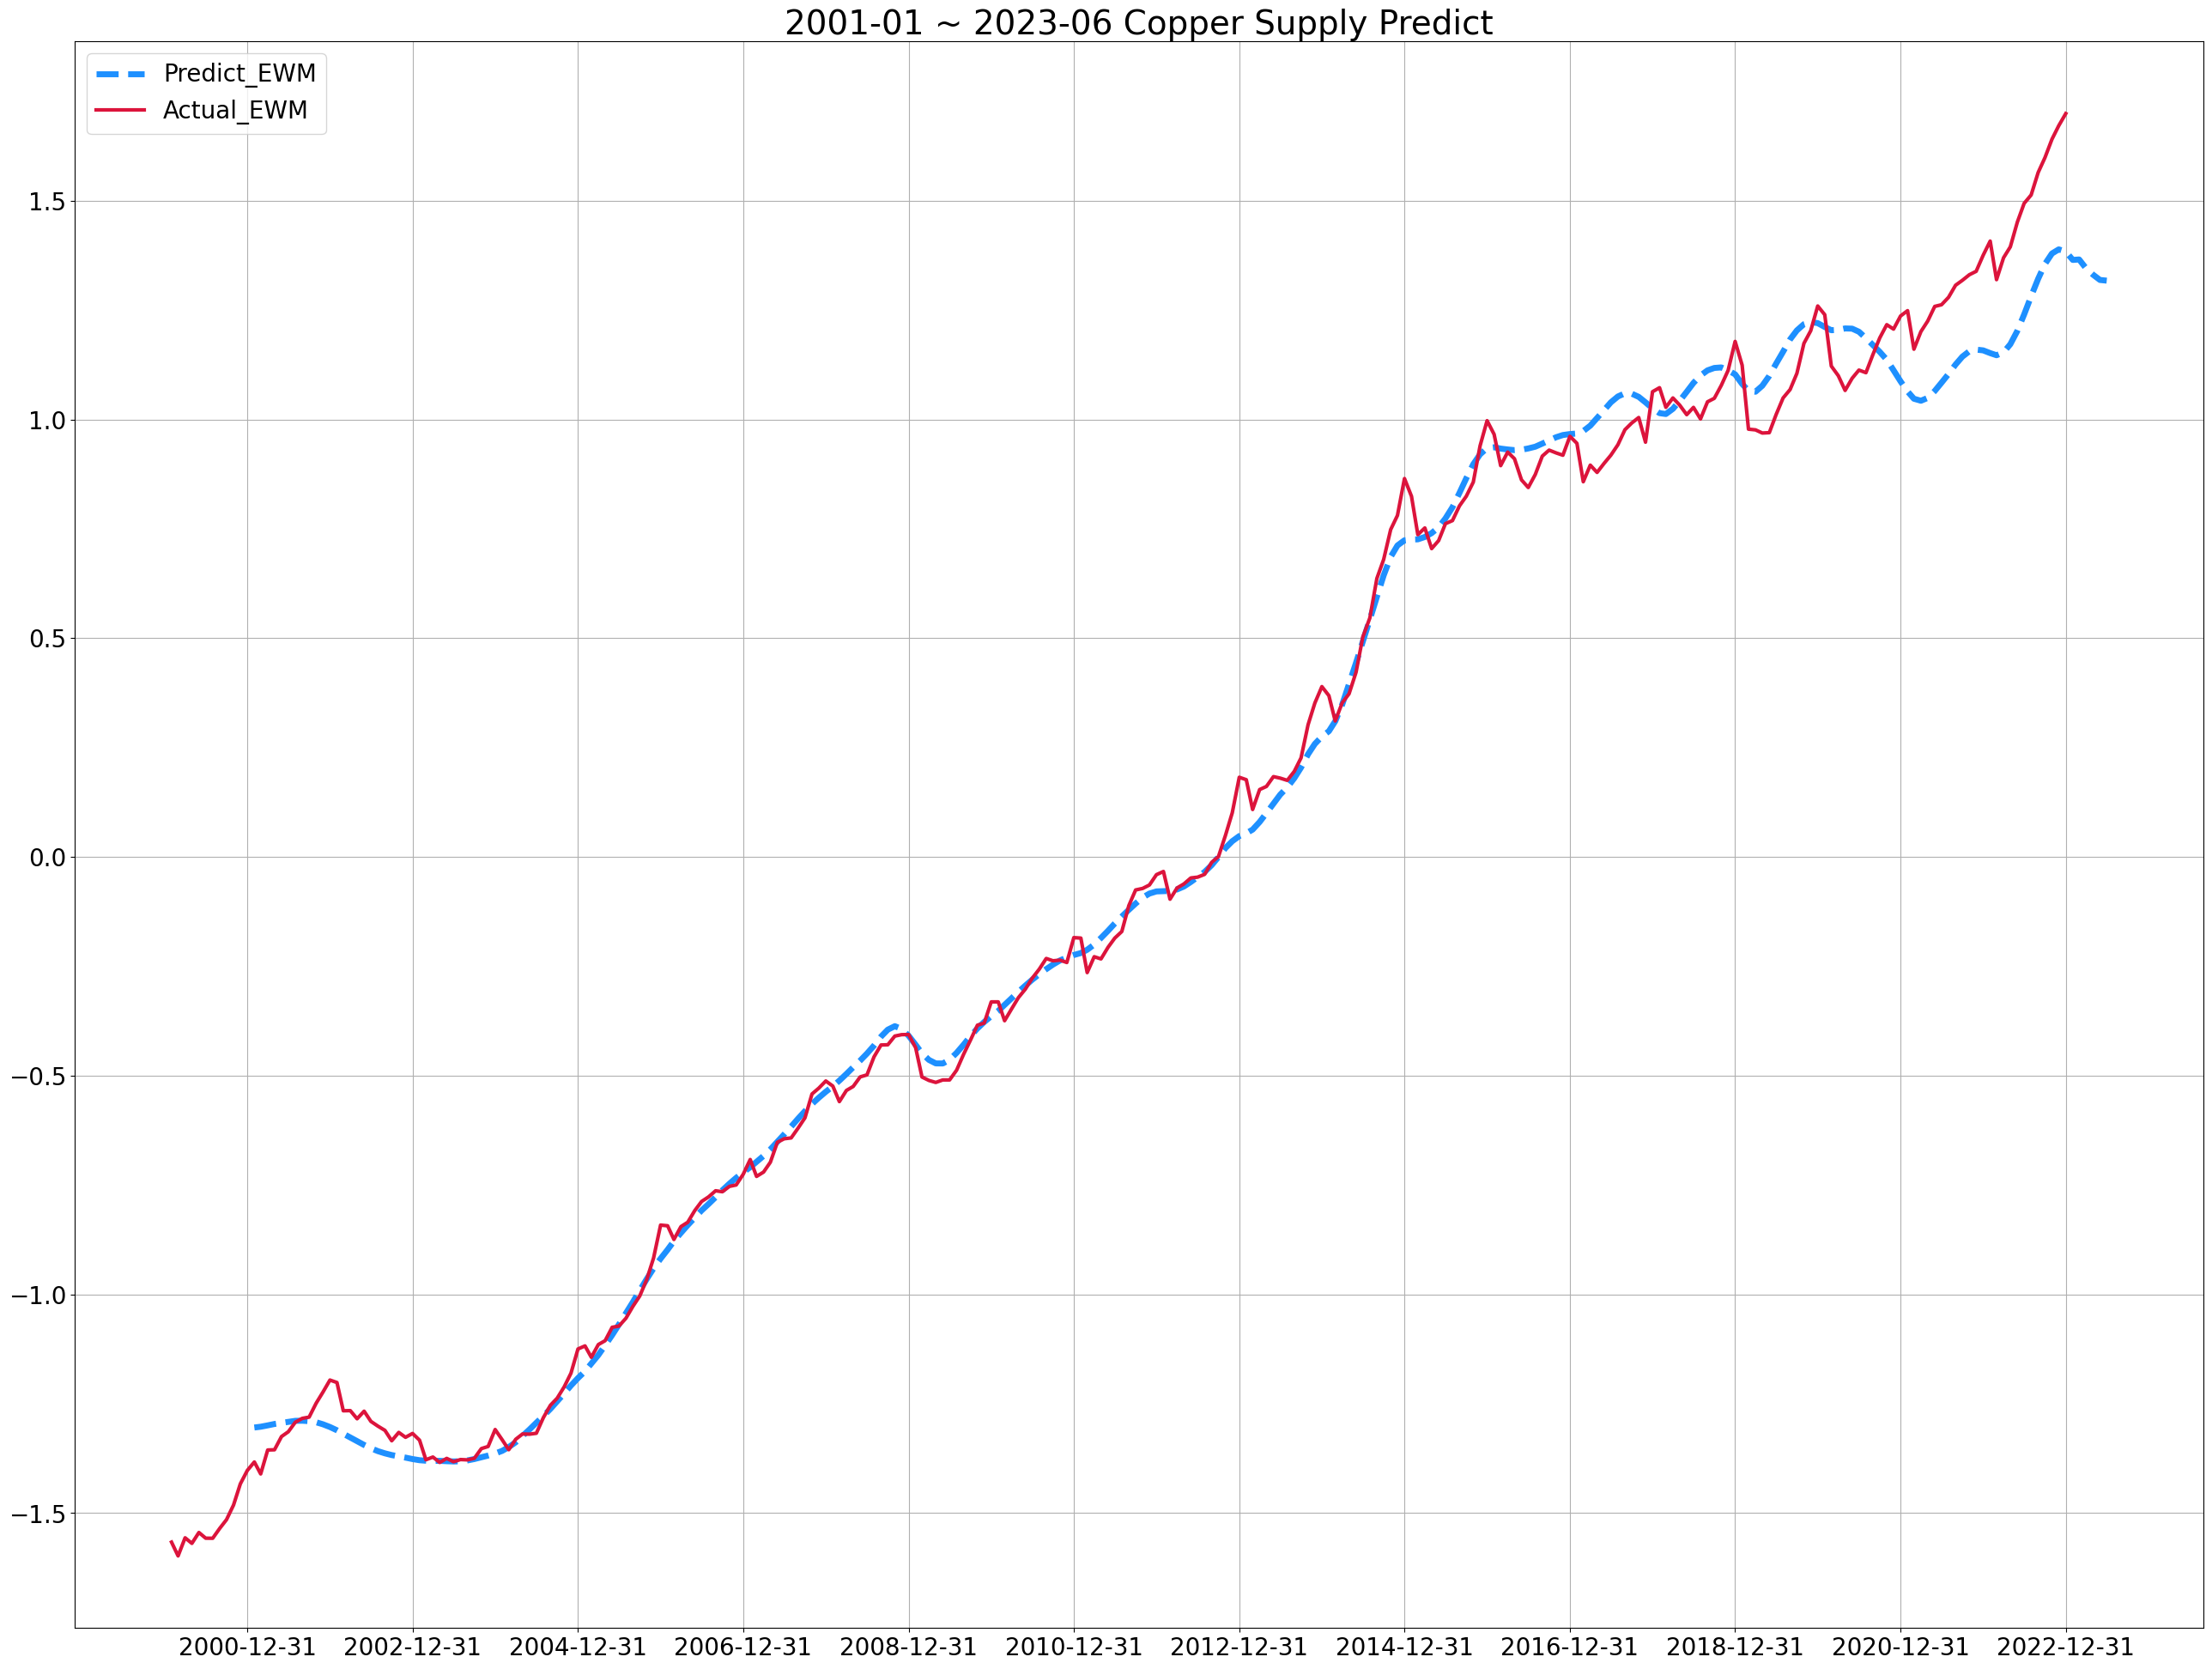

In [4]:
plt.figure(figsize=(32,24))

plt.plot(공급["Predict_EWM"], color='dodgerblue', ls='--', lw='5')
plt.plot(공급_["PX_LAST_STD_EWM"], color='crimson', lw='3')

plt.title("2001-01 ~ 2023-06 Copper Supply Predict", size=28)

plt.legend(["Predict_EWM", "Actual_EWM"], prop={'size': 20})
plt.xticks(pd.date_range("2000", "2023", freq = "2Y"), size=20)
plt.yticks(size=20)

plt.grid()
plt.show()

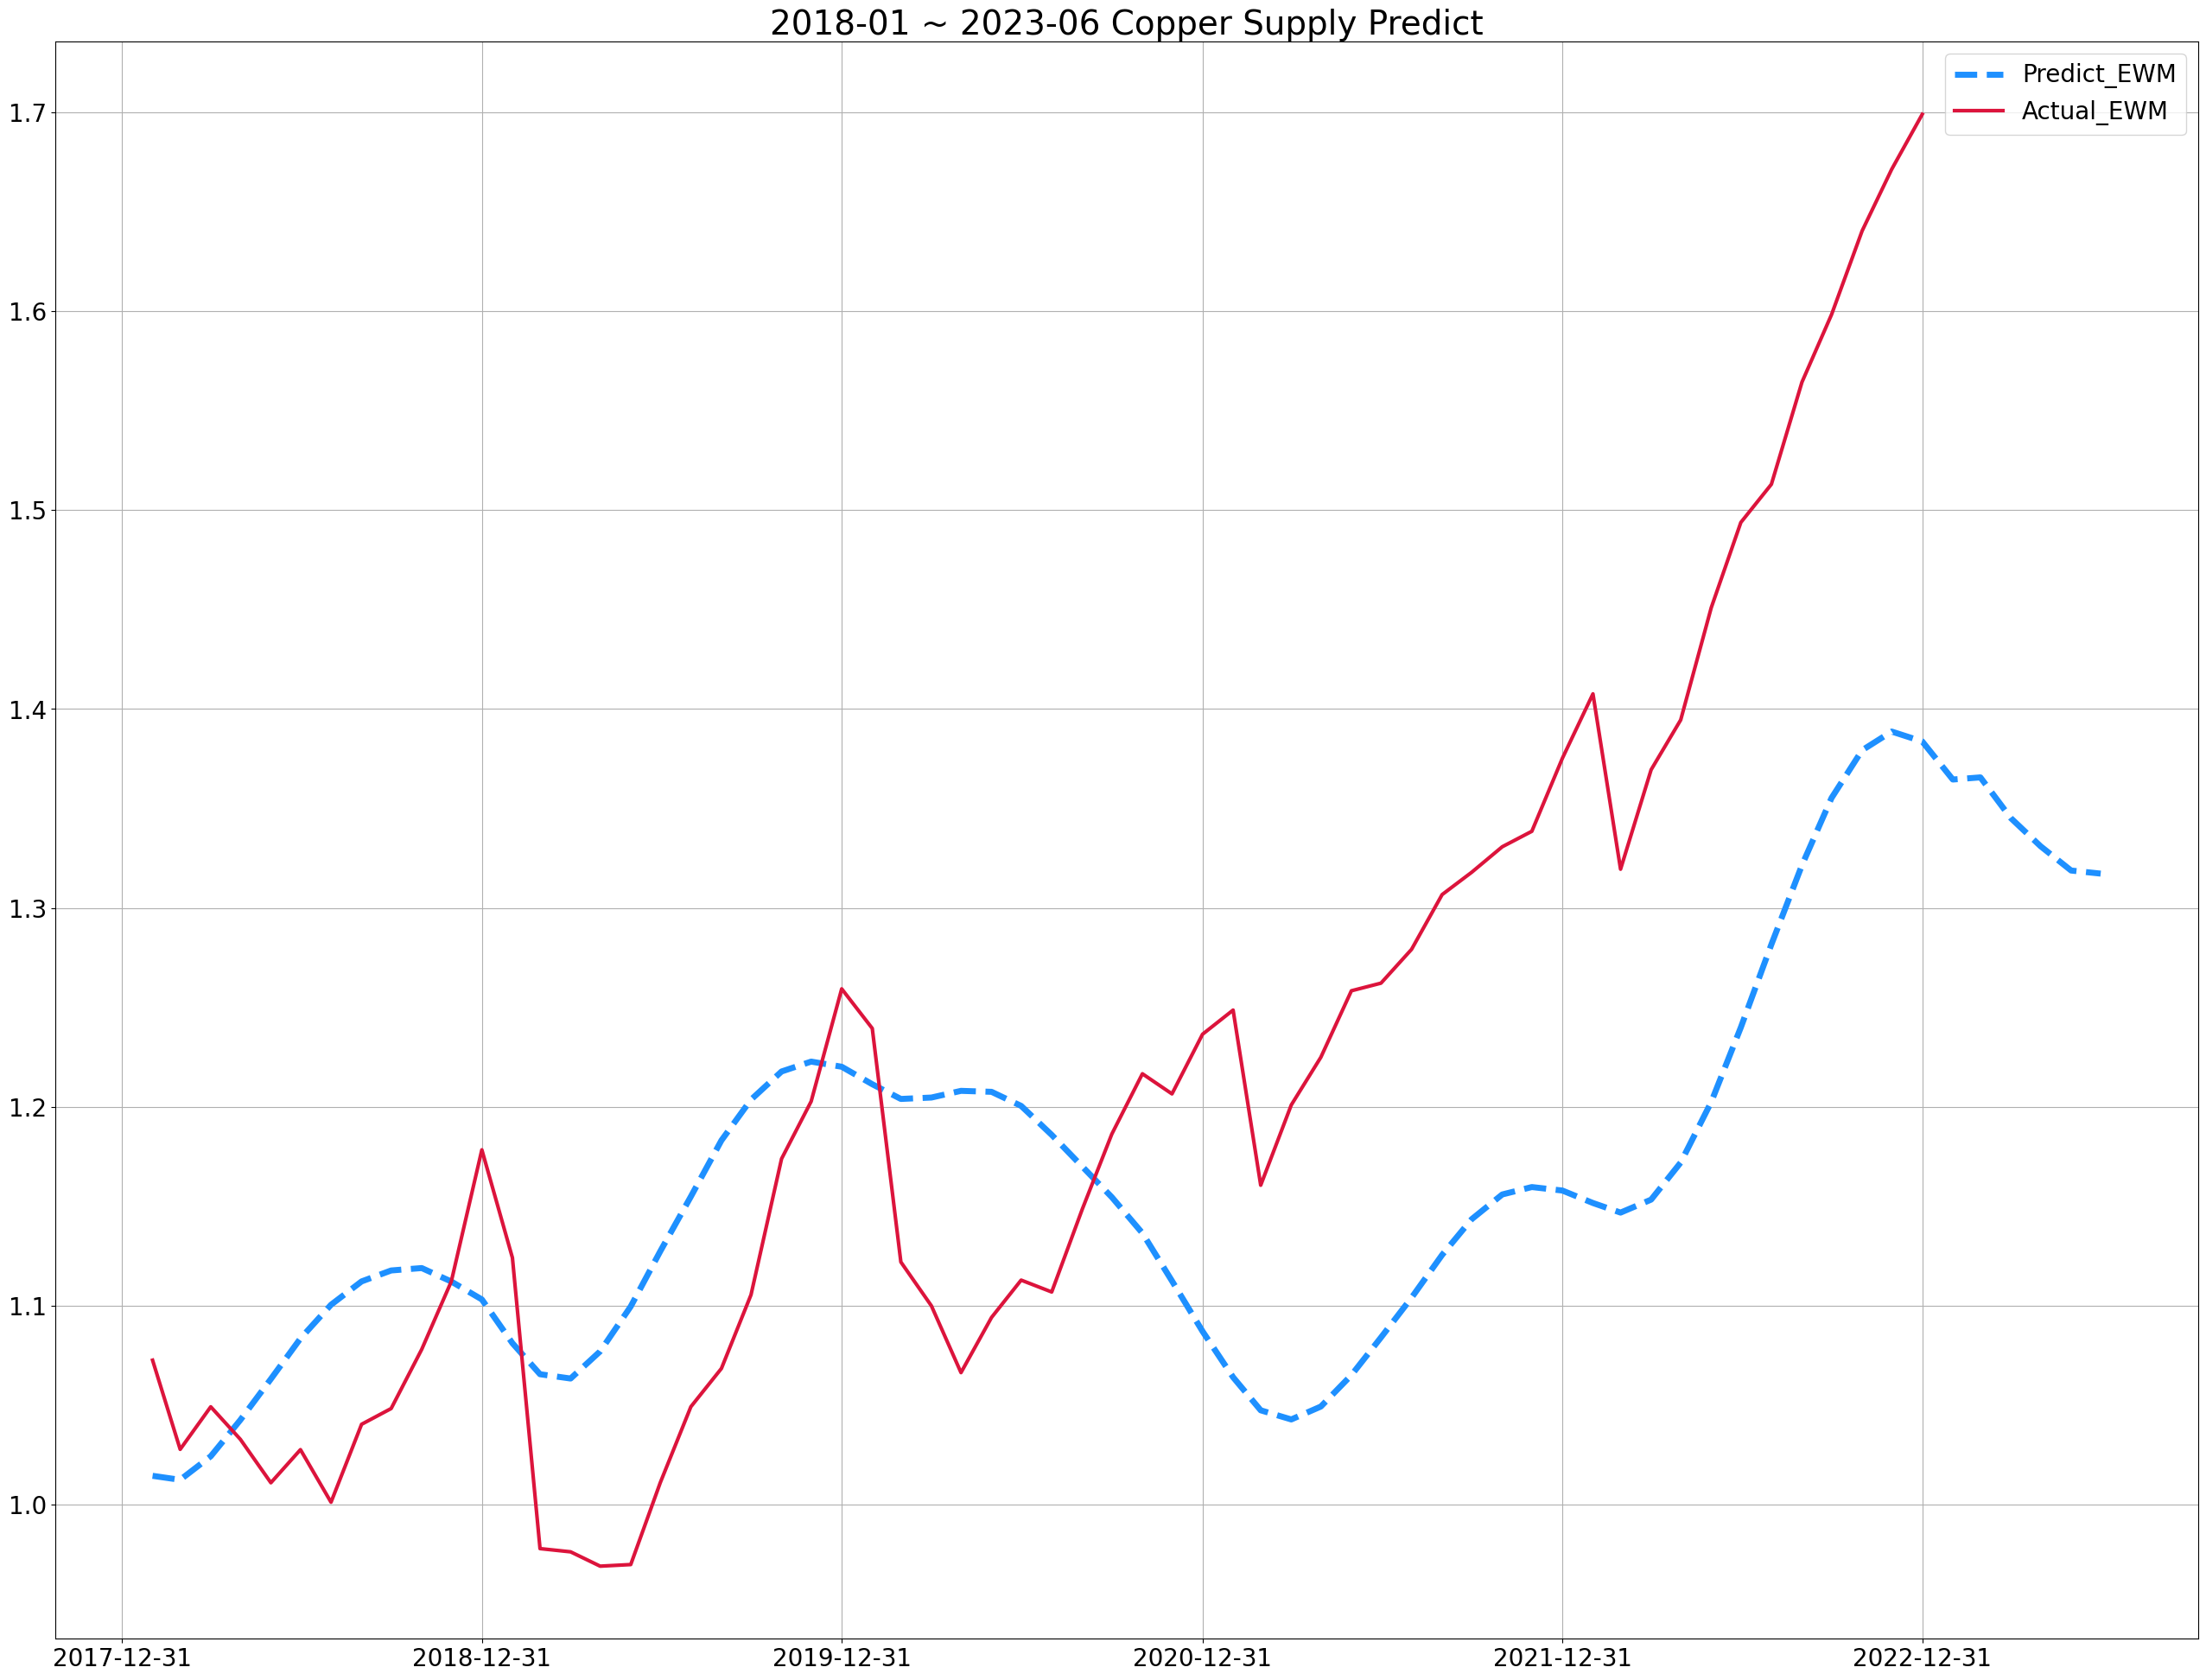

In [5]:
plt.figure(figsize=(32,24))

plt.plot(공급[-66:].index, 공급[-66:]["Predict_EWM"], color='dodgerblue', ls='--', lw='5')
plt.plot(공급_[-60:].index, 공급_[-60:]["PX_LAST_STD_EWM"], color='crimson', lw='3')

plt.title("2018-01 ~ 2023-06 Copper Supply Predict", size=28)

# plt.legend(["Predict", "Predict_EWM", "Actual_EWM"])
plt.legend(["Predict_EWM", "Actual_EWM"], prop={'size': 20})
plt.xticks(pd.date_range("2017", "2023", freq = "Y"), size=20)
plt.yticks(size=20)

plt.grid()
plt.show()

In [6]:
수요 = pd.read_csv("./수요공급 합치기/구리 수요 예측_최종.csv")
수요.index = pd.date_range("2001-01-01", "2023-07-01", freq="M")

In [7]:
temp = pd.concat([공급[["Predict_EWM"]], 수요[["Predict_EWM"]]], axis= 1)
temp.columns = ["Supply", "Demand"]
temp

,Supply,Demand
2001-01-31,-1.304276,-1.151529
2001-02-28,-1.302485,-1.155400
2001-03-31,-1.299420,-1.162332
2001-04-30,-1.296216,-1.170713
2001-05-31,-1.293739,-1.178218
...,...,...
2023-02-28,1.365635,1.480707
2023-03-31,1.345081,1.408562
2023-04-30,1.331023,1.394627
2023-05-31,1.318786,1.381553


In [8]:
temp["D-S"] = temp["Demand"] - temp["Supply"]

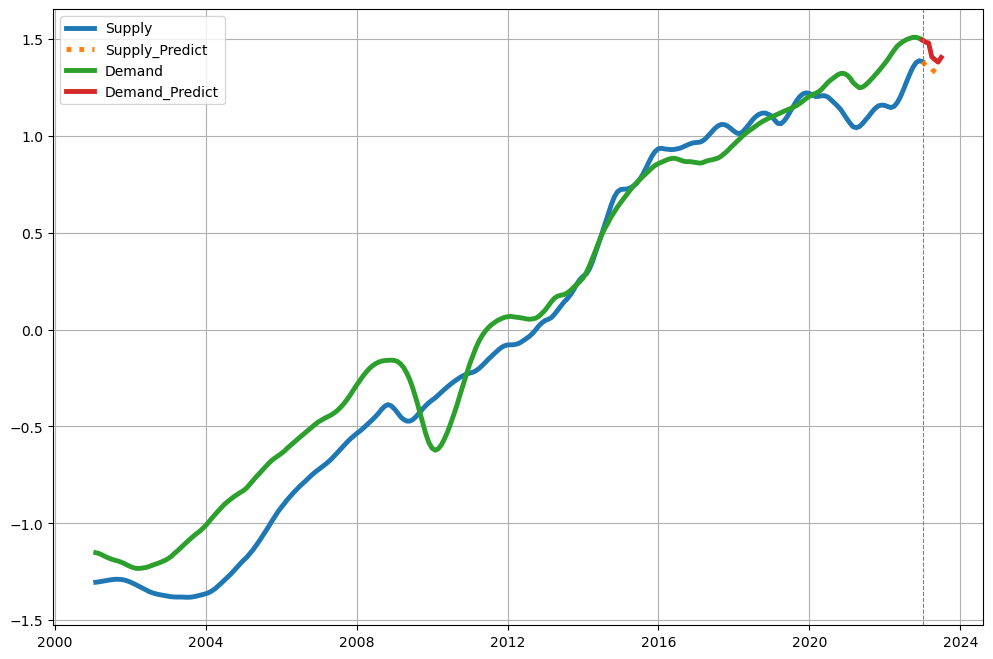

In [9]:
plt.figure(figsize=(12,8))

plt.plot(temp.index[:-6], temp["Supply"][:-6], lw='3.5')
plt.plot(temp.index[-7:], temp["Supply"][-7:], ls=":", lw='3.5')
plt.plot(temp.index[:-6], temp["Demand"][:-6], lw='3.5')
plt.plot(temp.index[-7:], temp["Demand"][-7:], ls="-", lw='3.5')

plt.axvline(pd.Timestamp('2023-01-01'), color='gray', ls='--', lw='0.8')
plt.legend(["Supply","Supply_Predict", "Demand","Demand_Predict"])

plt.grid()
plt.show()

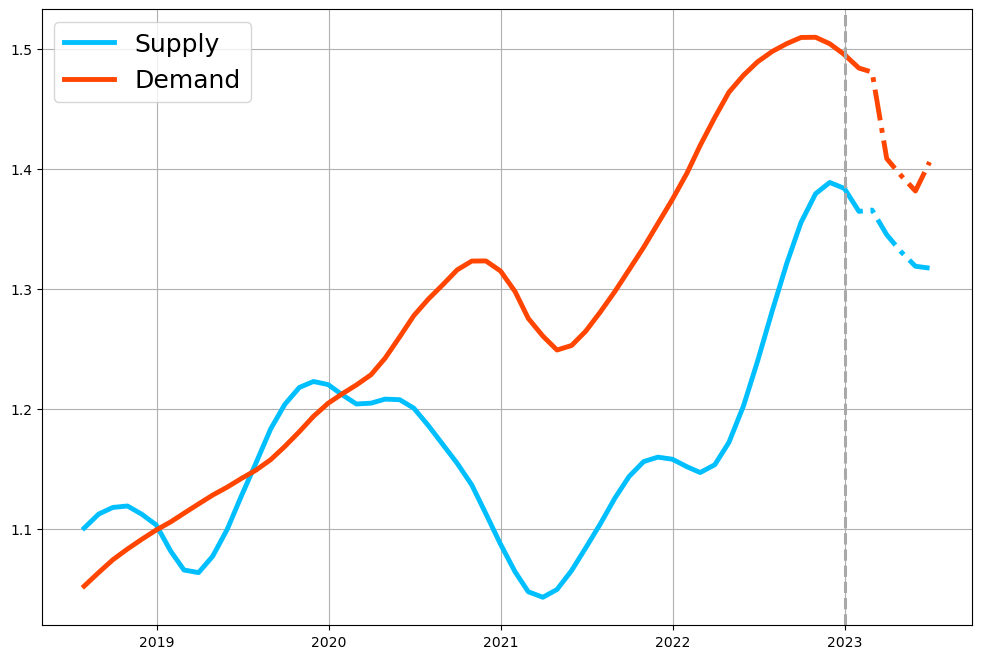

In [10]:
plt.figure(figsize=(12,8))

plt.plot(temp.index[-60:-6], temp["Supply"][-60:-6], lw='3.5', color='deepskyblue')
plt.plot(temp.index[-60:-6], temp["Demand"][-60:-6], lw='3.5', color='orangered')
plt.plot(temp.index[-7:], temp["Supply"][-7:], ls="-.", lw='3.5', color='deepskyblue')
plt.plot(temp.index[-7:], temp["Demand"][-7:], ls="-.", lw='3.5', color='orangered')

plt.axvline(pd.Timestamp('2023-01-01'), color='darkgray', ls='--', lw='2.2')
plt.legend(["Supply", "Demand"], loc='upper left', fontsize="18")

plt.grid()
plt.show()

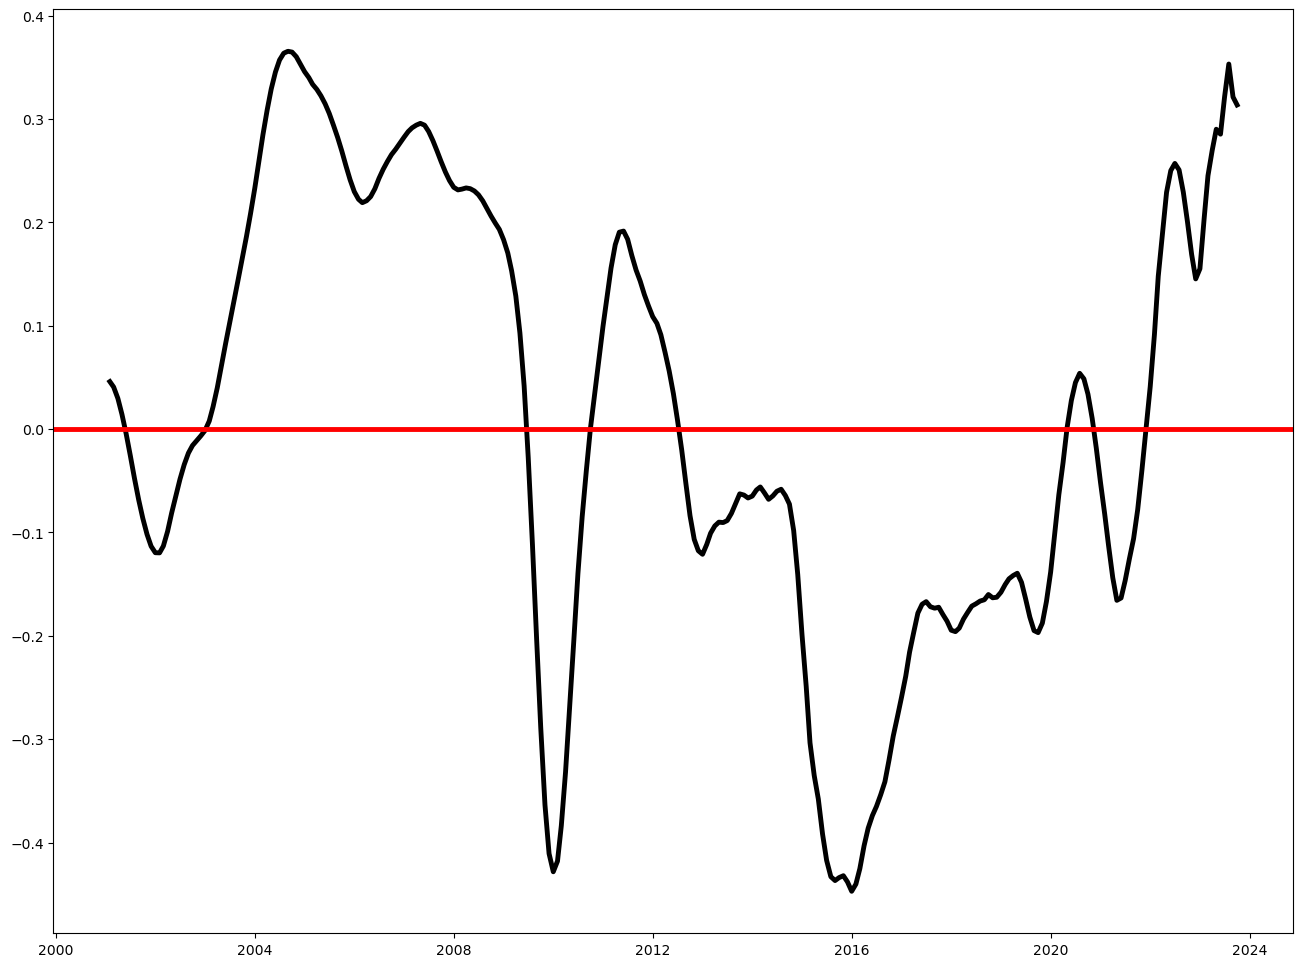

In [46]:
plt.figure(figsize=(16,12))

plt.plot(temp.index, temp["D-S"], color='black', lw='3.5')
plt.axhline(0, color='red', lw='3.5')

plt.show()

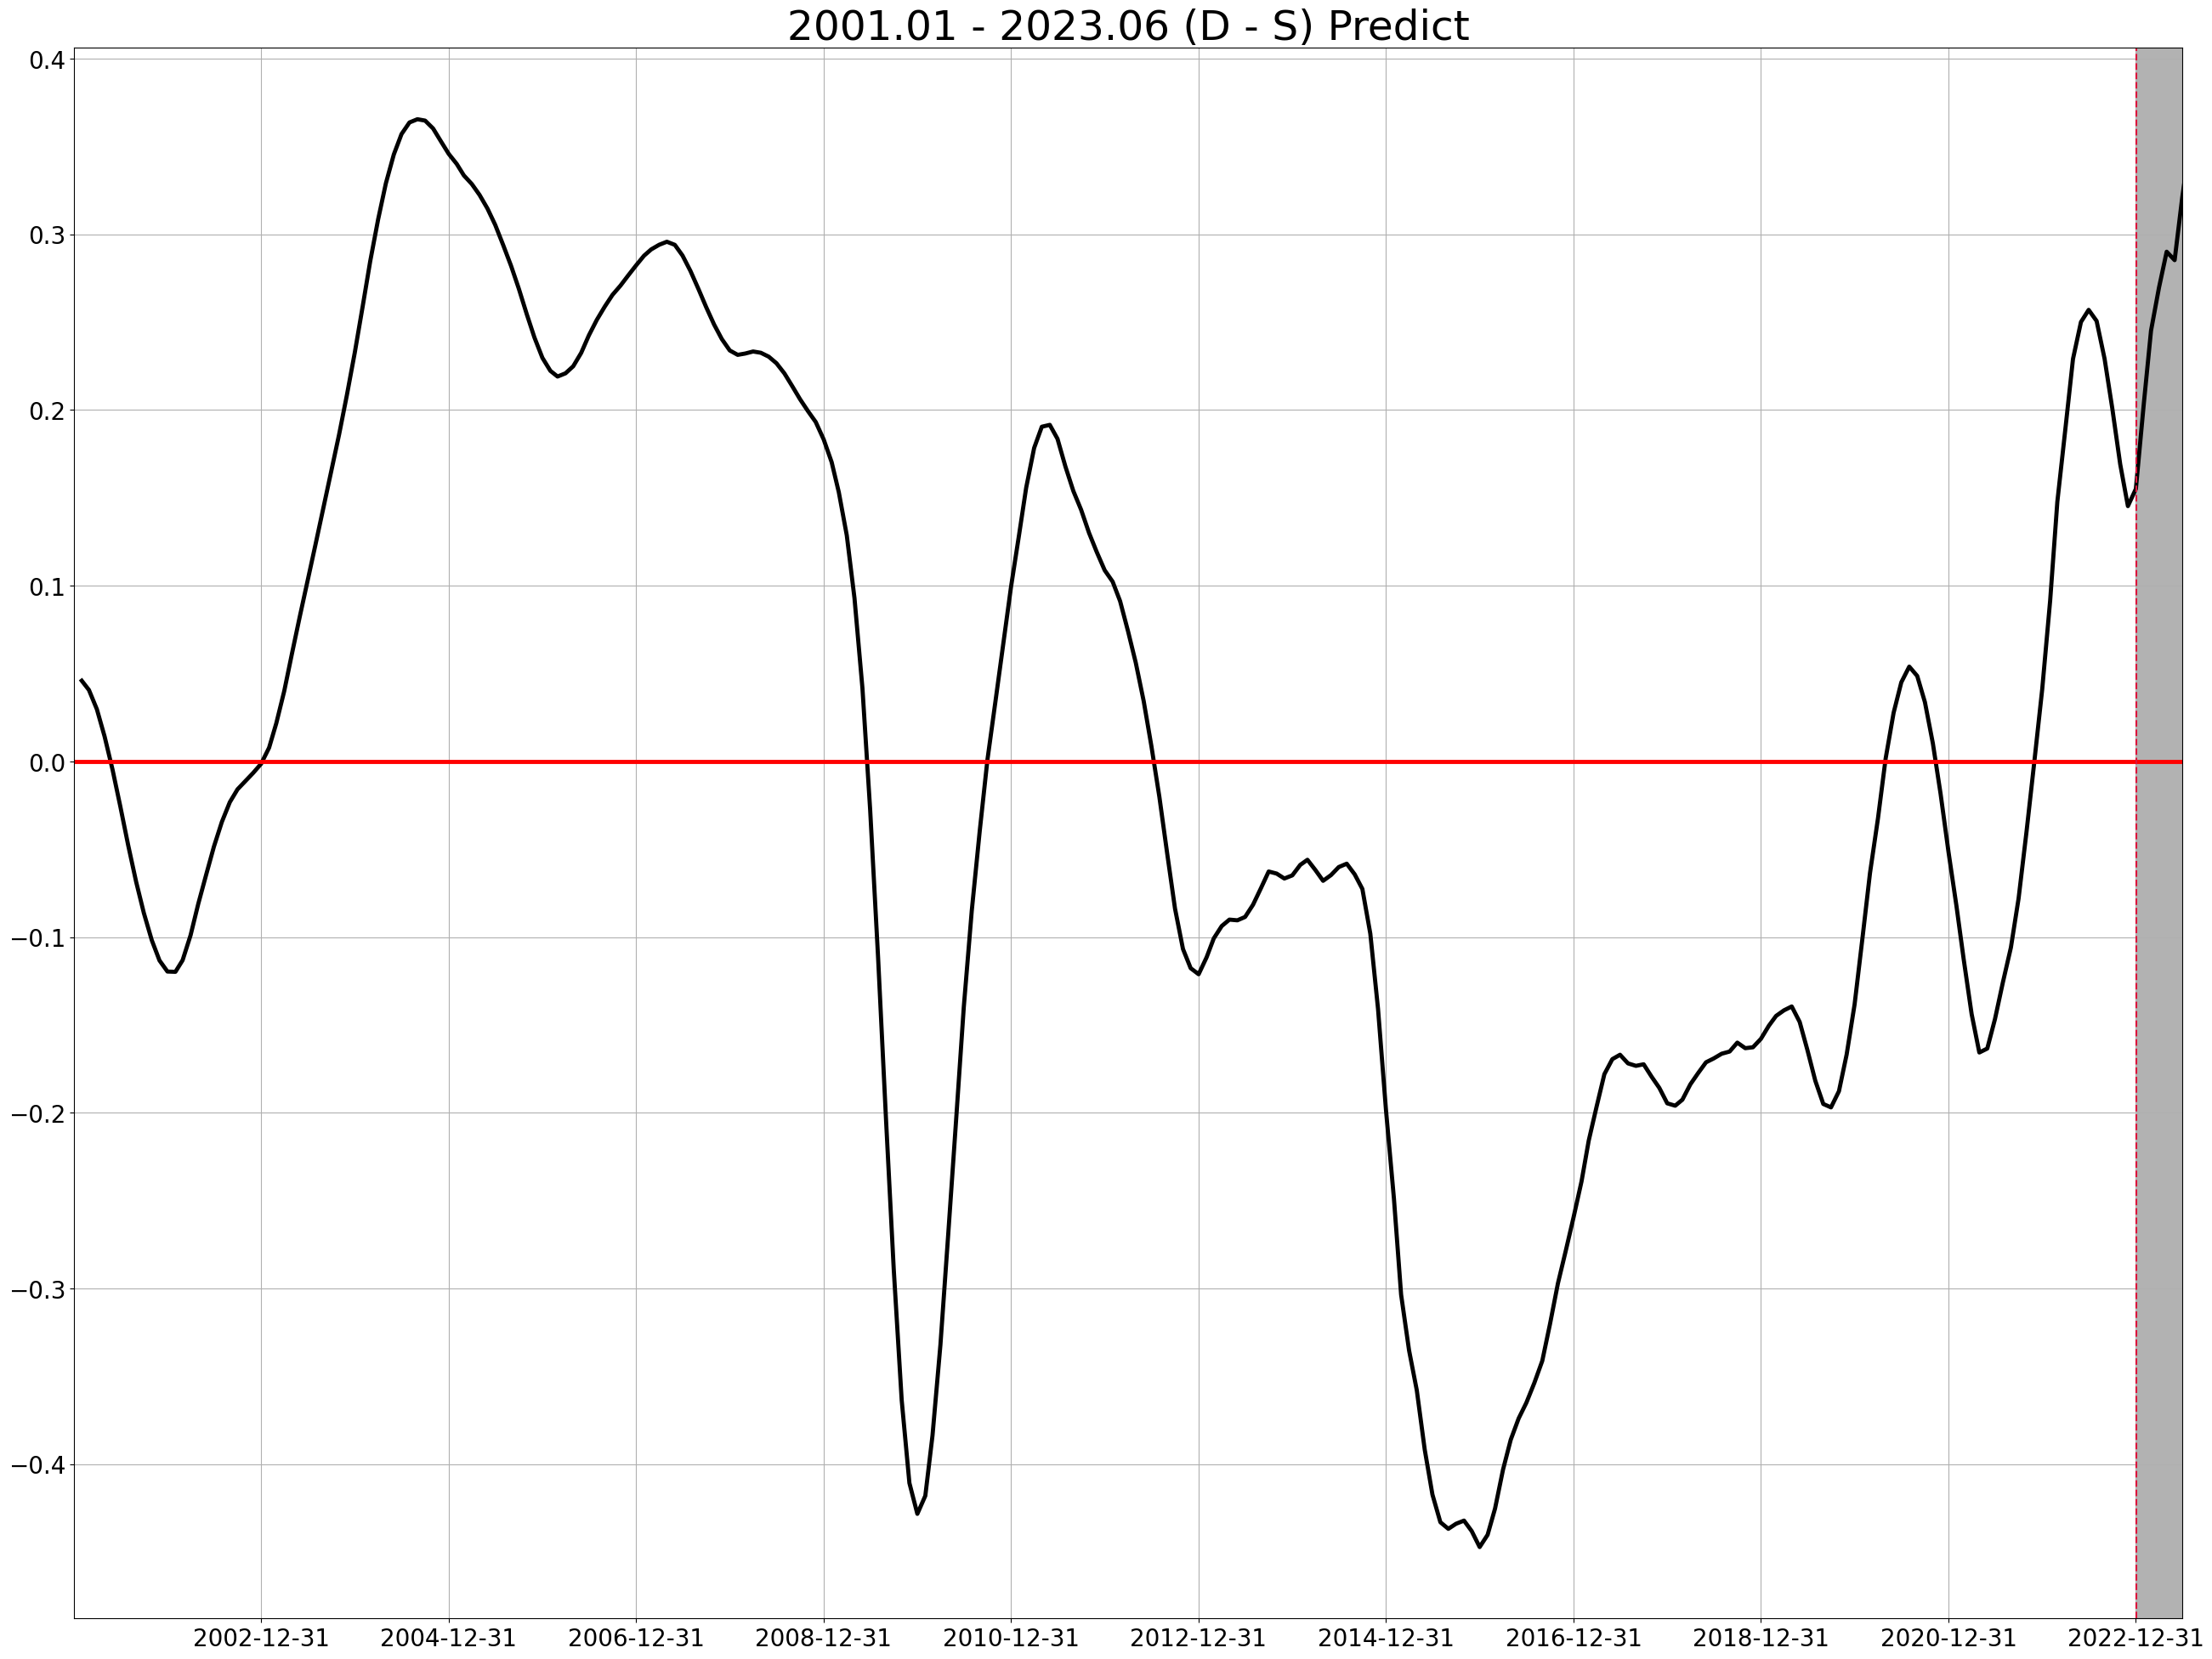

In [45]:
plt.figure(figsize=(32,24))

plt.plot(temp.index, temp["D-S"], color='black', lw='3.5')
plt.axhline(0, color='red', lw='3.5')
plt.axvline(pd.Timestamp('2023-01-01'), color='crimson', ls='--', lw='1.5')
plt.xticks(pd.date_range("2000", "2023", freq = "2Y"), size=20)
plt.yticks(size=20)
plt.axvspan(pd.to_datetime("2023-01-01"), pd.to_datetime("2023-07-30"), facecolor='gray', alpha=0.6)
plt.xlim(pd.to_datetime("2001-01-01"), pd.to_datetime("2023-06-30"))

plt.title("2001.01 - 2023.06 (D - S) Predict", size = 35)
plt.grid()
plt.show()

In [10]:
a = pd.read_csv("./구리 수요/수요 독립변수.csv")
a = a[["Date", "HSI_value", "CCI_value","IPI_value","GDPC_value","Copper price"]].reset_index(drop=True)
b = pd.read_csv("./구리 수요/수요 새로운 종속변수.csv")
b = b.drop("Unnamed: 0", axis =1)
구리수요 = pd.concat([a, b[["PX_LAST"]]], axis = 1)[60:].reset_index(drop=True)

In [11]:
MOVING_MEAN = 구리수요["PX_LAST"].mean(axis=0)
MOVING_STD = 구리수요["PX_LAST"].std(axis=0)

구리수요["PX_LAST_STD"] = (구리수요["PX_LAST"] - MOVING_MEAN) / MOVING_STD
구리수요["PX_LAST_STD_EWM"] = 구리수요["PX_LAST_STD"].ewm(span=9, adjust=False).mean()
구리수요["PX_LAST_EWM"] = 구리수요["PX_LAST"].ewm(span=9, adjust=False).mean()
구리수요.index = pd.to_datetime(구리수요["Date"])
구리수요 = 구리수요.drop("Date", axis = 1)

In [12]:
aa = 수요[["Predict_EWM"]]
aa.index = pd.date_range("2001-01-01", "2023-07-01", freq = "M")
aa

,Predict_EWM
2001-01-31,-1.151529
2001-02-28,-1.155400
2001-03-31,-1.162332
2001-04-30,-1.170713
2001-05-31,-1.178218
...,...
2023-02-28,1.480707
2023-03-31,1.408562
2023-04-30,1.394627
2023-05-31,1.381553


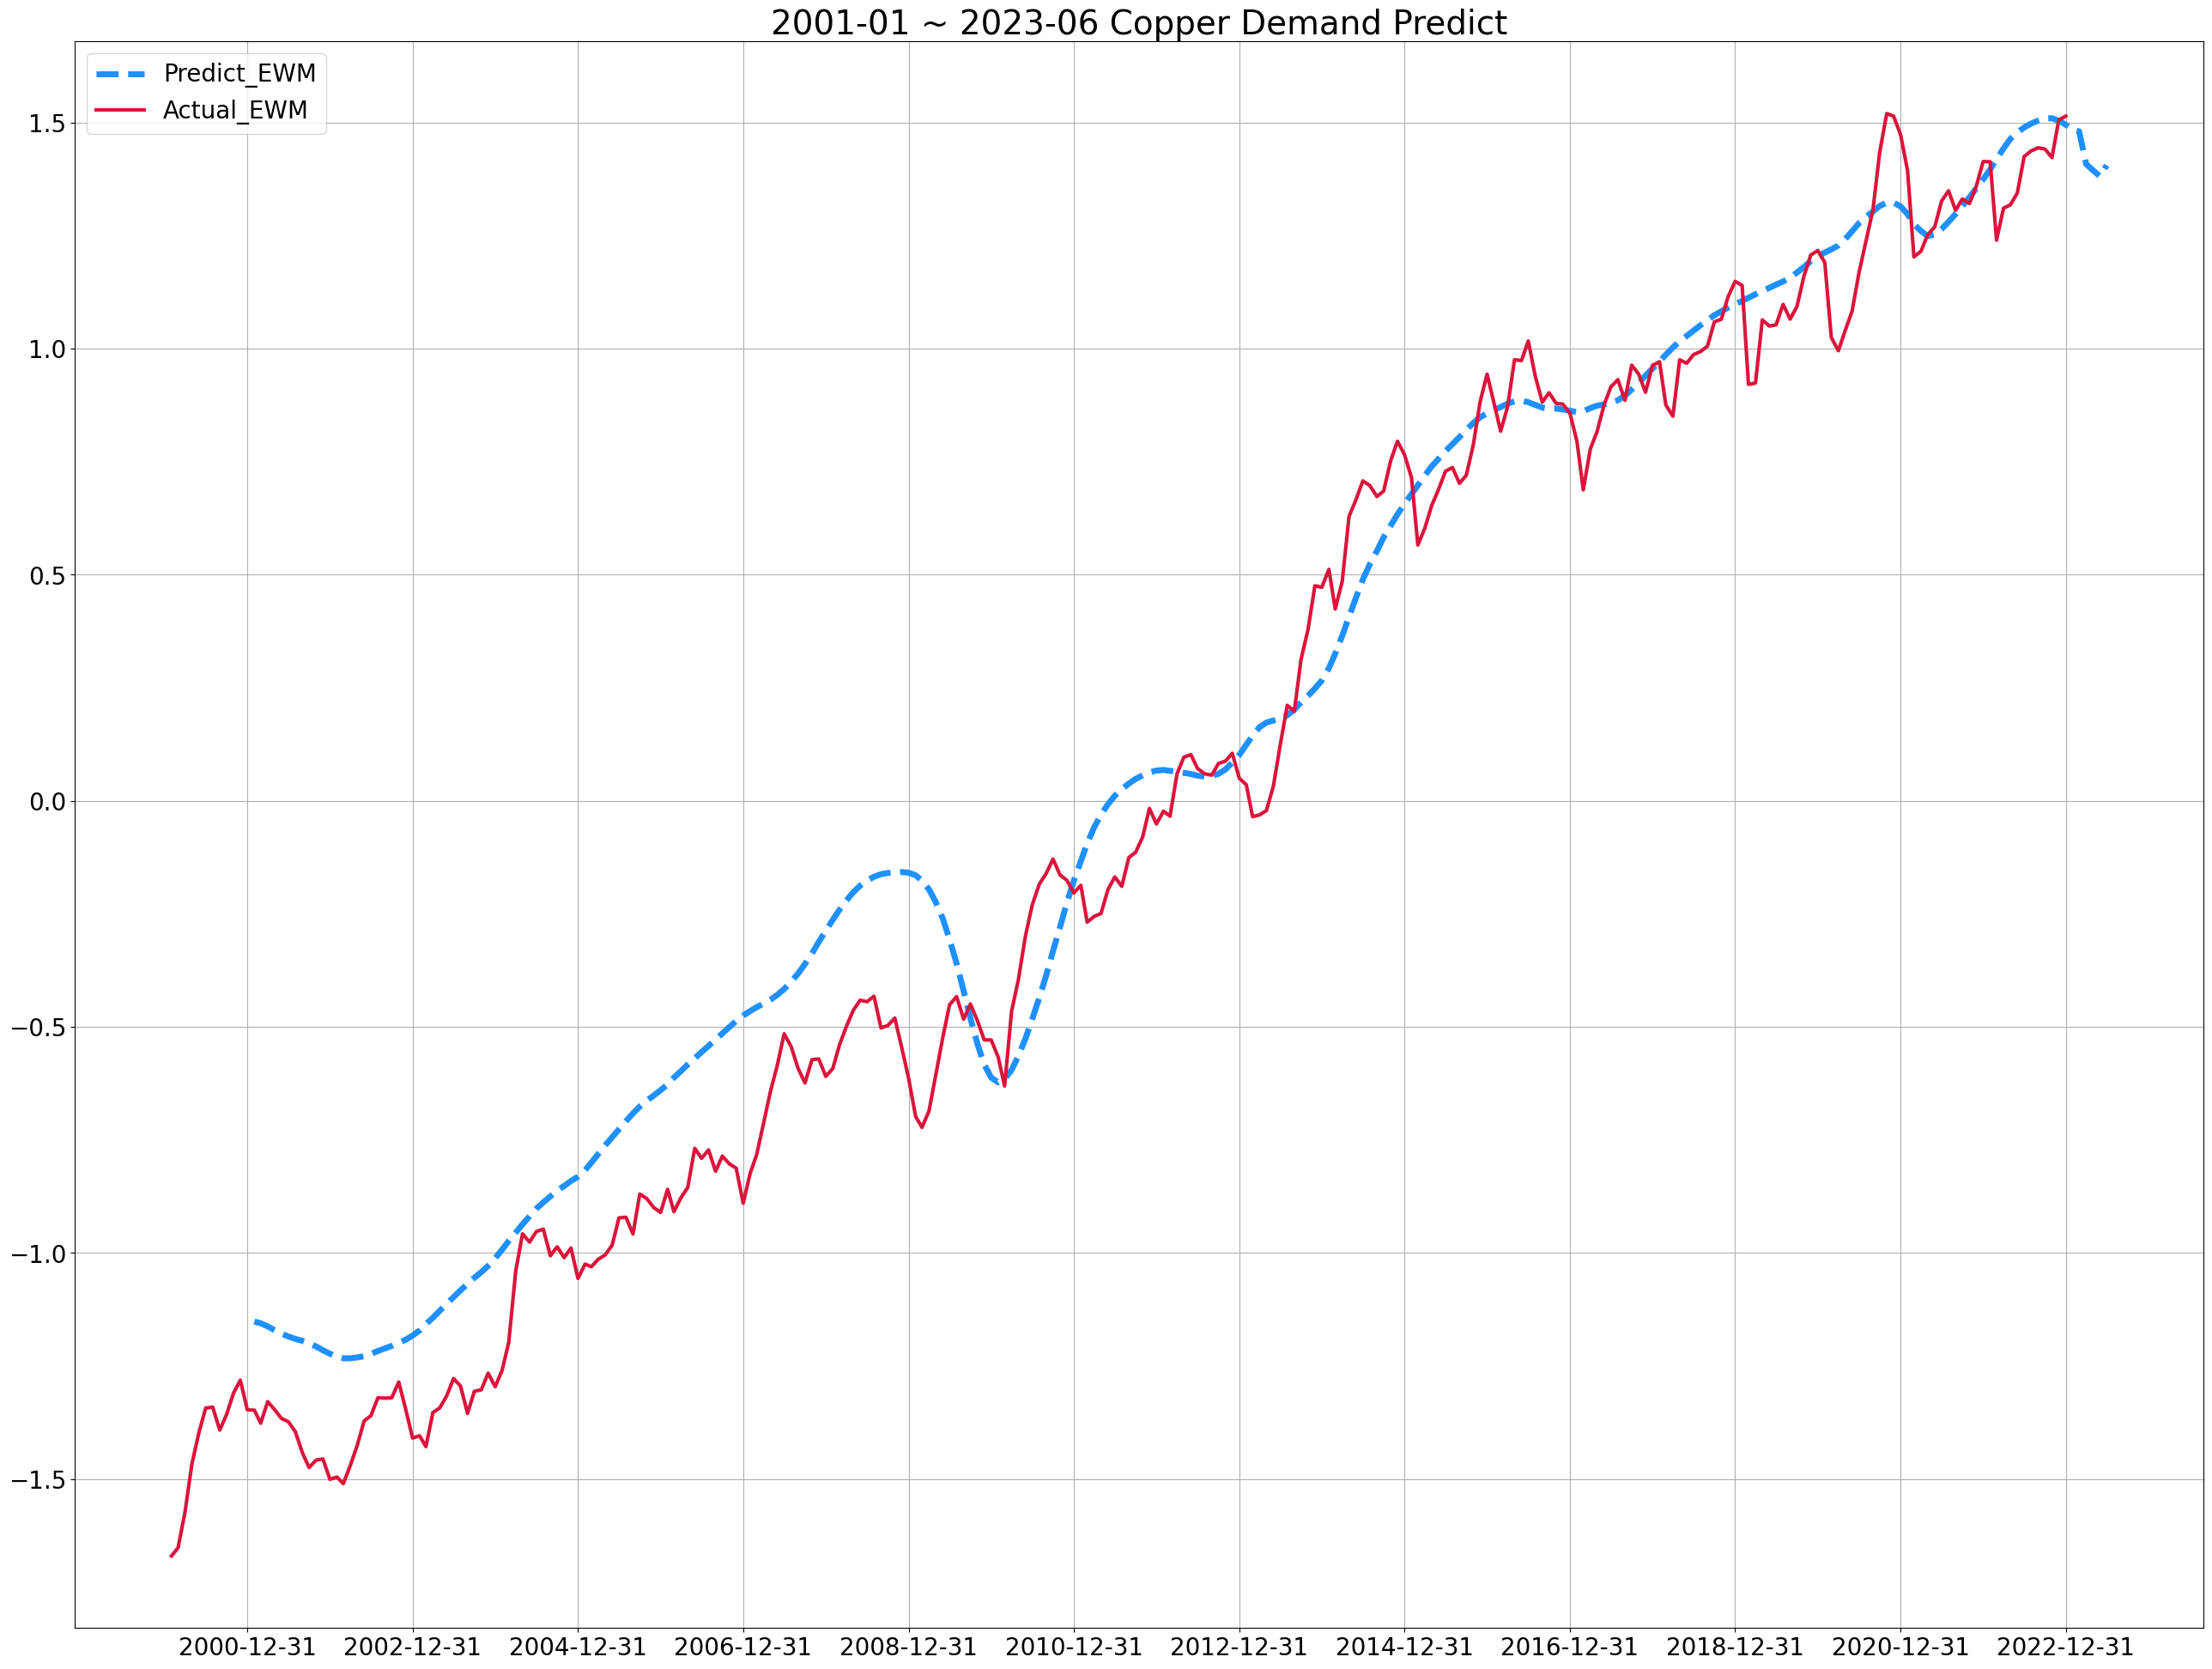

In [21]:
plt.figure(figsize=(32,24))

plt.plot(aa["Predict_EWM"], color='dodgerblue', ls='--', lw='5')
plt.plot(구리수요["PX_LAST_STD_EWM"], color='crimson', lw='3')

plt.title("2001-01 ~ 2023-06 Copper Demand Predict", size=28)

# plt.legend(["Predict", "Predict_EWM", "Actual_EWM"])
plt.legend(["Predict_EWM", "Actual_EWM"], prop={'size': 20})
plt.xticks(pd.date_range("2000", "2023", freq = "2Y"), size=20)
plt.yticks(size=20)

plt.grid()
plt.show()

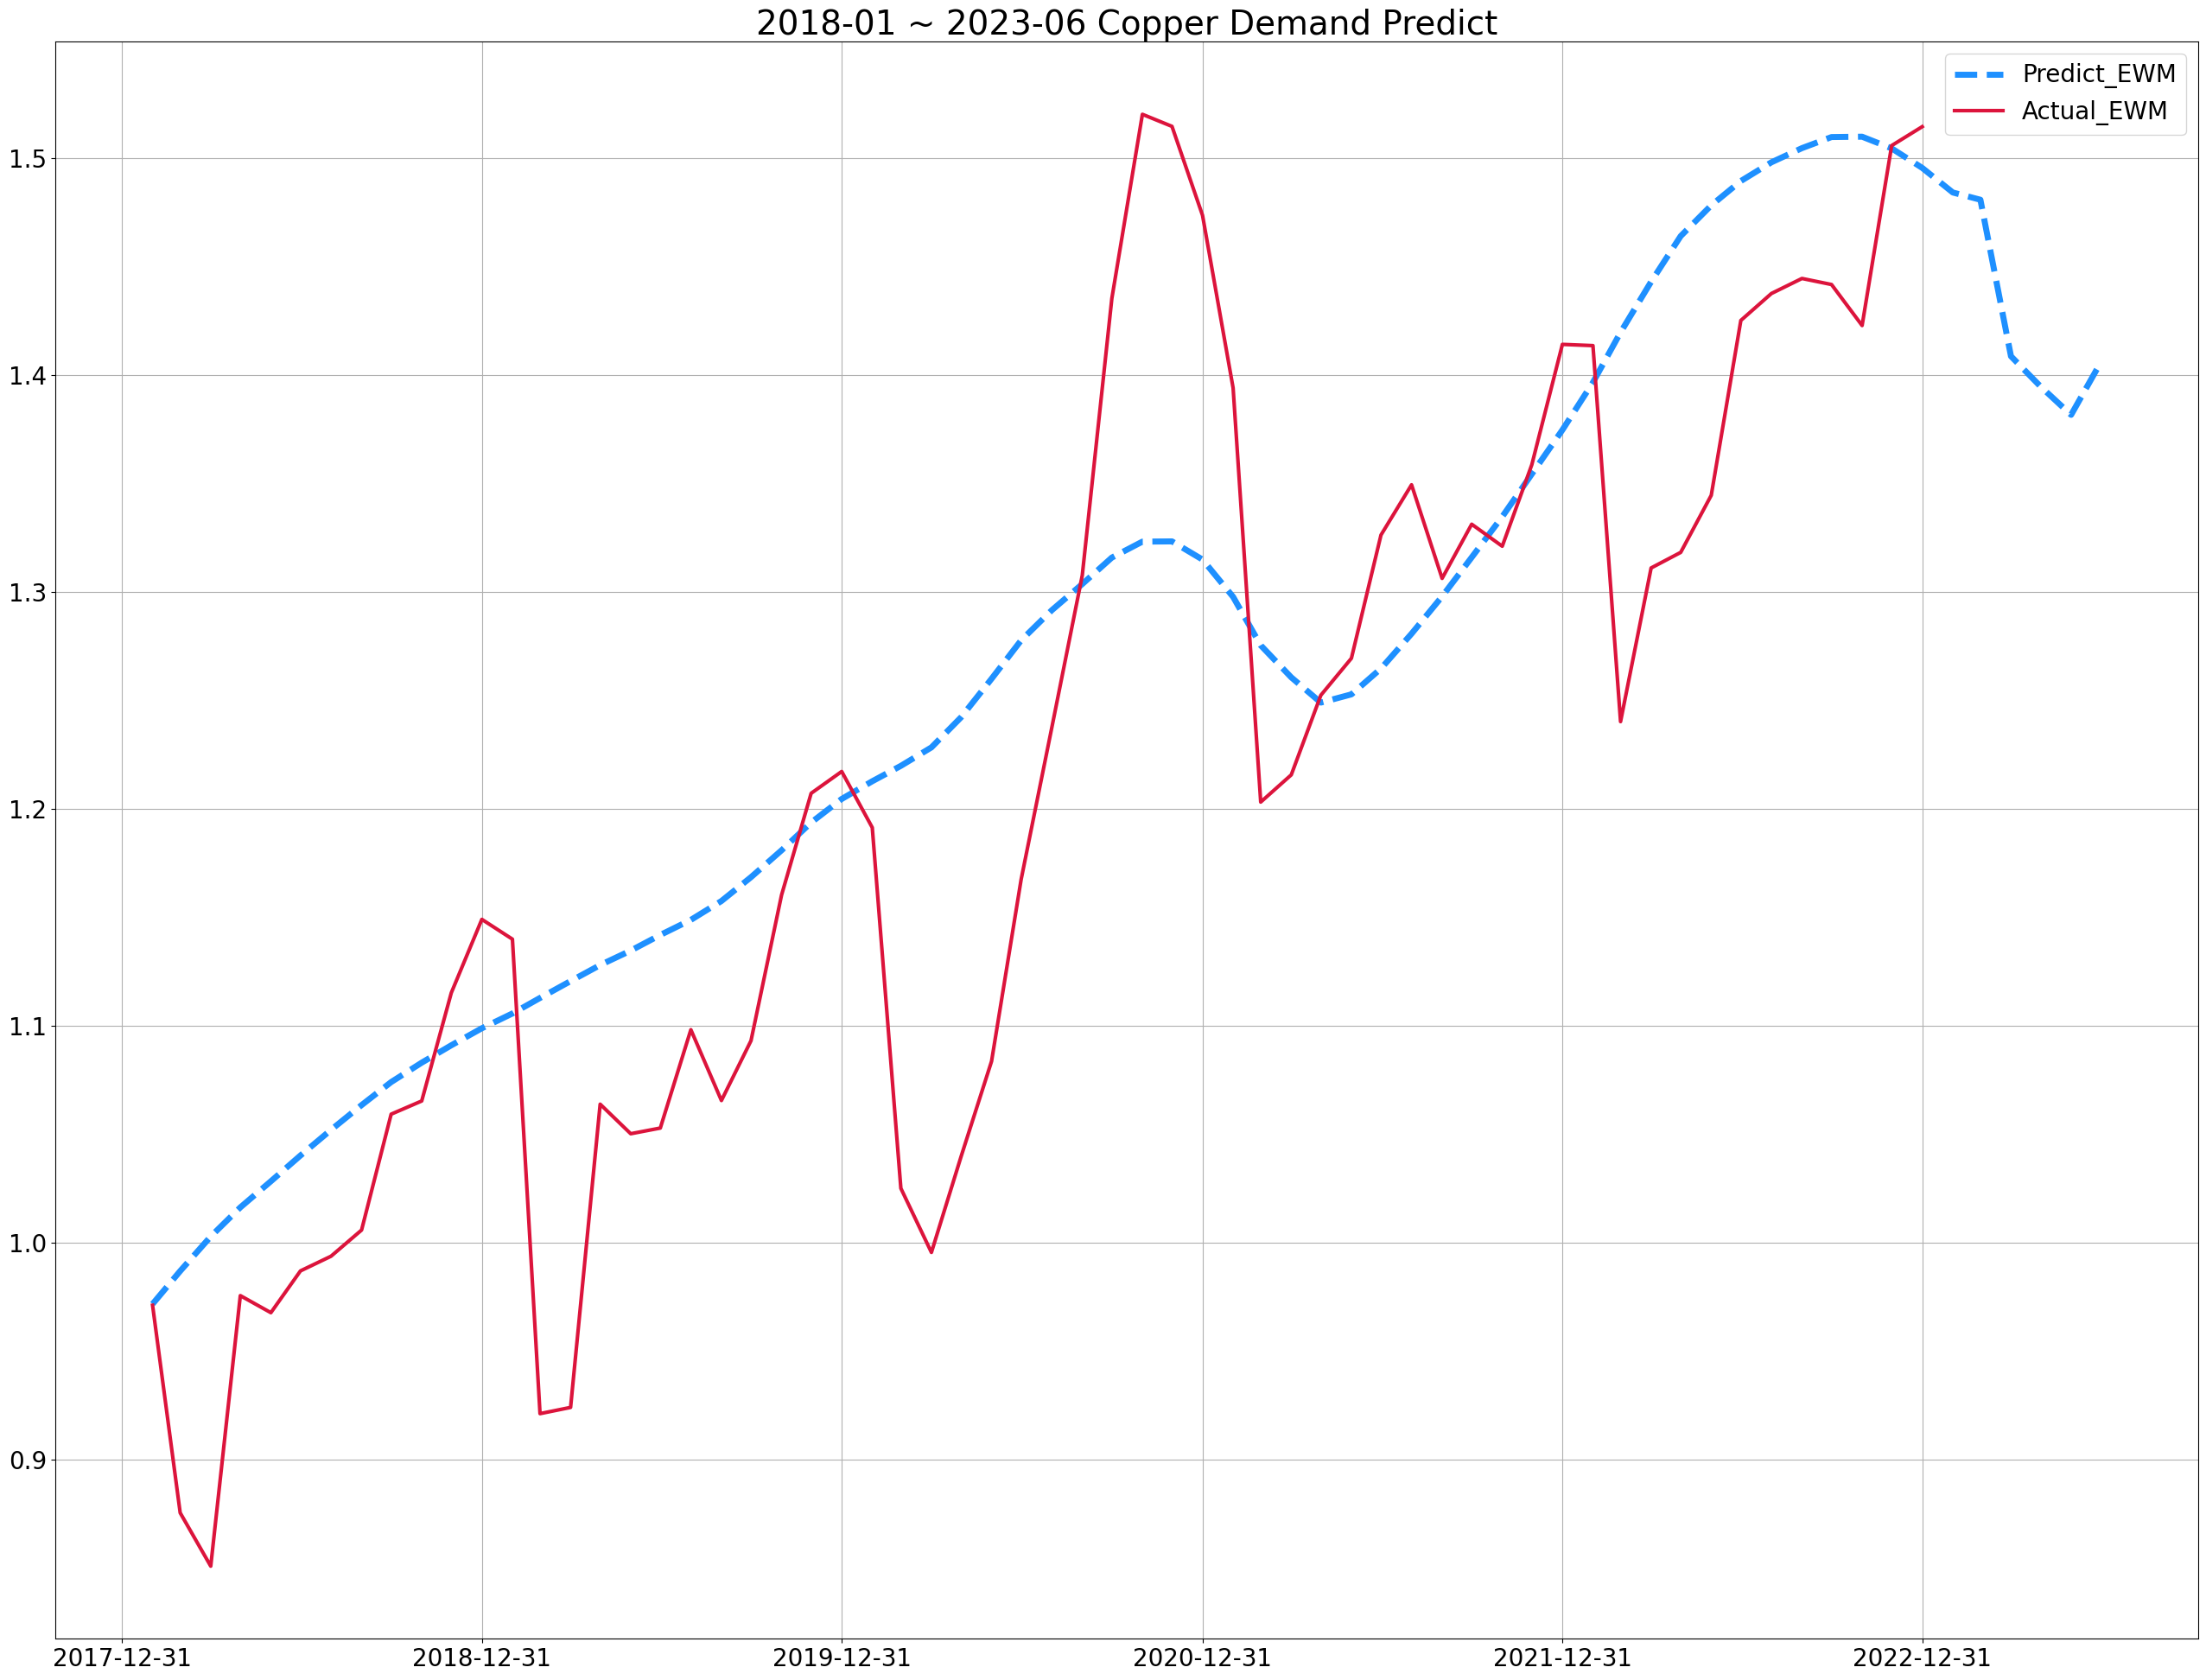

In [32]:
plt.figure(figsize=(32,24))

plt.plot(aa[-66:].index, aa[-66:]["Predict_EWM"], color='dodgerblue', ls='--', lw='5')
plt.plot(구리수요[-60:].index, 구리수요[-60:]["PX_LAST_STD_EWM"], color='crimson', lw='3')

plt.title("2018-01 ~ 2023-06 Copper Demand Predict", size=28)

# plt.legend(["Predict", "Predict_EWM", "Actual_EWM"])
plt.legend(["Predict_EWM", "Actual_EWM"], prop={'size': 20})
plt.xticks(pd.date_range("2017", "2023", freq = "Y"), size=20)
plt.yticks(size=20)

plt.grid()
plt.show()

In [109]:
공급_

,Copper price,Cash Costs,Total tonnage transported,Total(MT),Oil Price (Dollars per Barrel),Mining GDP,PX_LAST,PX_LAST_STD,PX_LAST_STD_EWM,PX_LAST_EWM
2000-01-31,0.855289,0.39,929,977430,25.51,2907.36,1202241.000,-1.566250,-1.566250,1.202241e+06
2000-02-29,0.827855,0.39,929,986124,27.78,2907.36,1155760.000,-1.723923,-1.597785,1.192945e+06
2000-03-31,0.805130,0.39,929,921473,27.49,2907.36,1253977.000,-1.390752,-1.556378,1.205151e+06
2000-04-30,0.776305,0.39,967,850796,22.76,2904.28,1186378.000,-1.620061,-1.569115,1.201397e+06
2000-05-31,0.831318,0.39,967,744466,27.74,2904.28,1238011.000,-1.444911,-1.544274,1.208719e+06
...,...,...,...,...,...,...,...,...,...,...
2022-08-31,3.605426,1.66,1728,199734,100.45,4455.22,2185700.966,1.769836,1.564420,2.125145e+06
2022-09-30,3.452800,1.66,1728,206470,89.76,4455.22,2175231.107,1.734320,1.598400,2.135163e+06
2022-10-31,3.424152,1.27,1811,210105,93.33,4550.94,2197174.494,1.808756,1.640471,2.147565e+06
2022-11-30,3.656582,1.27,1811,193376,91.42,4550.94,2193243.262,1.795421,1.671461,2.156701e+06


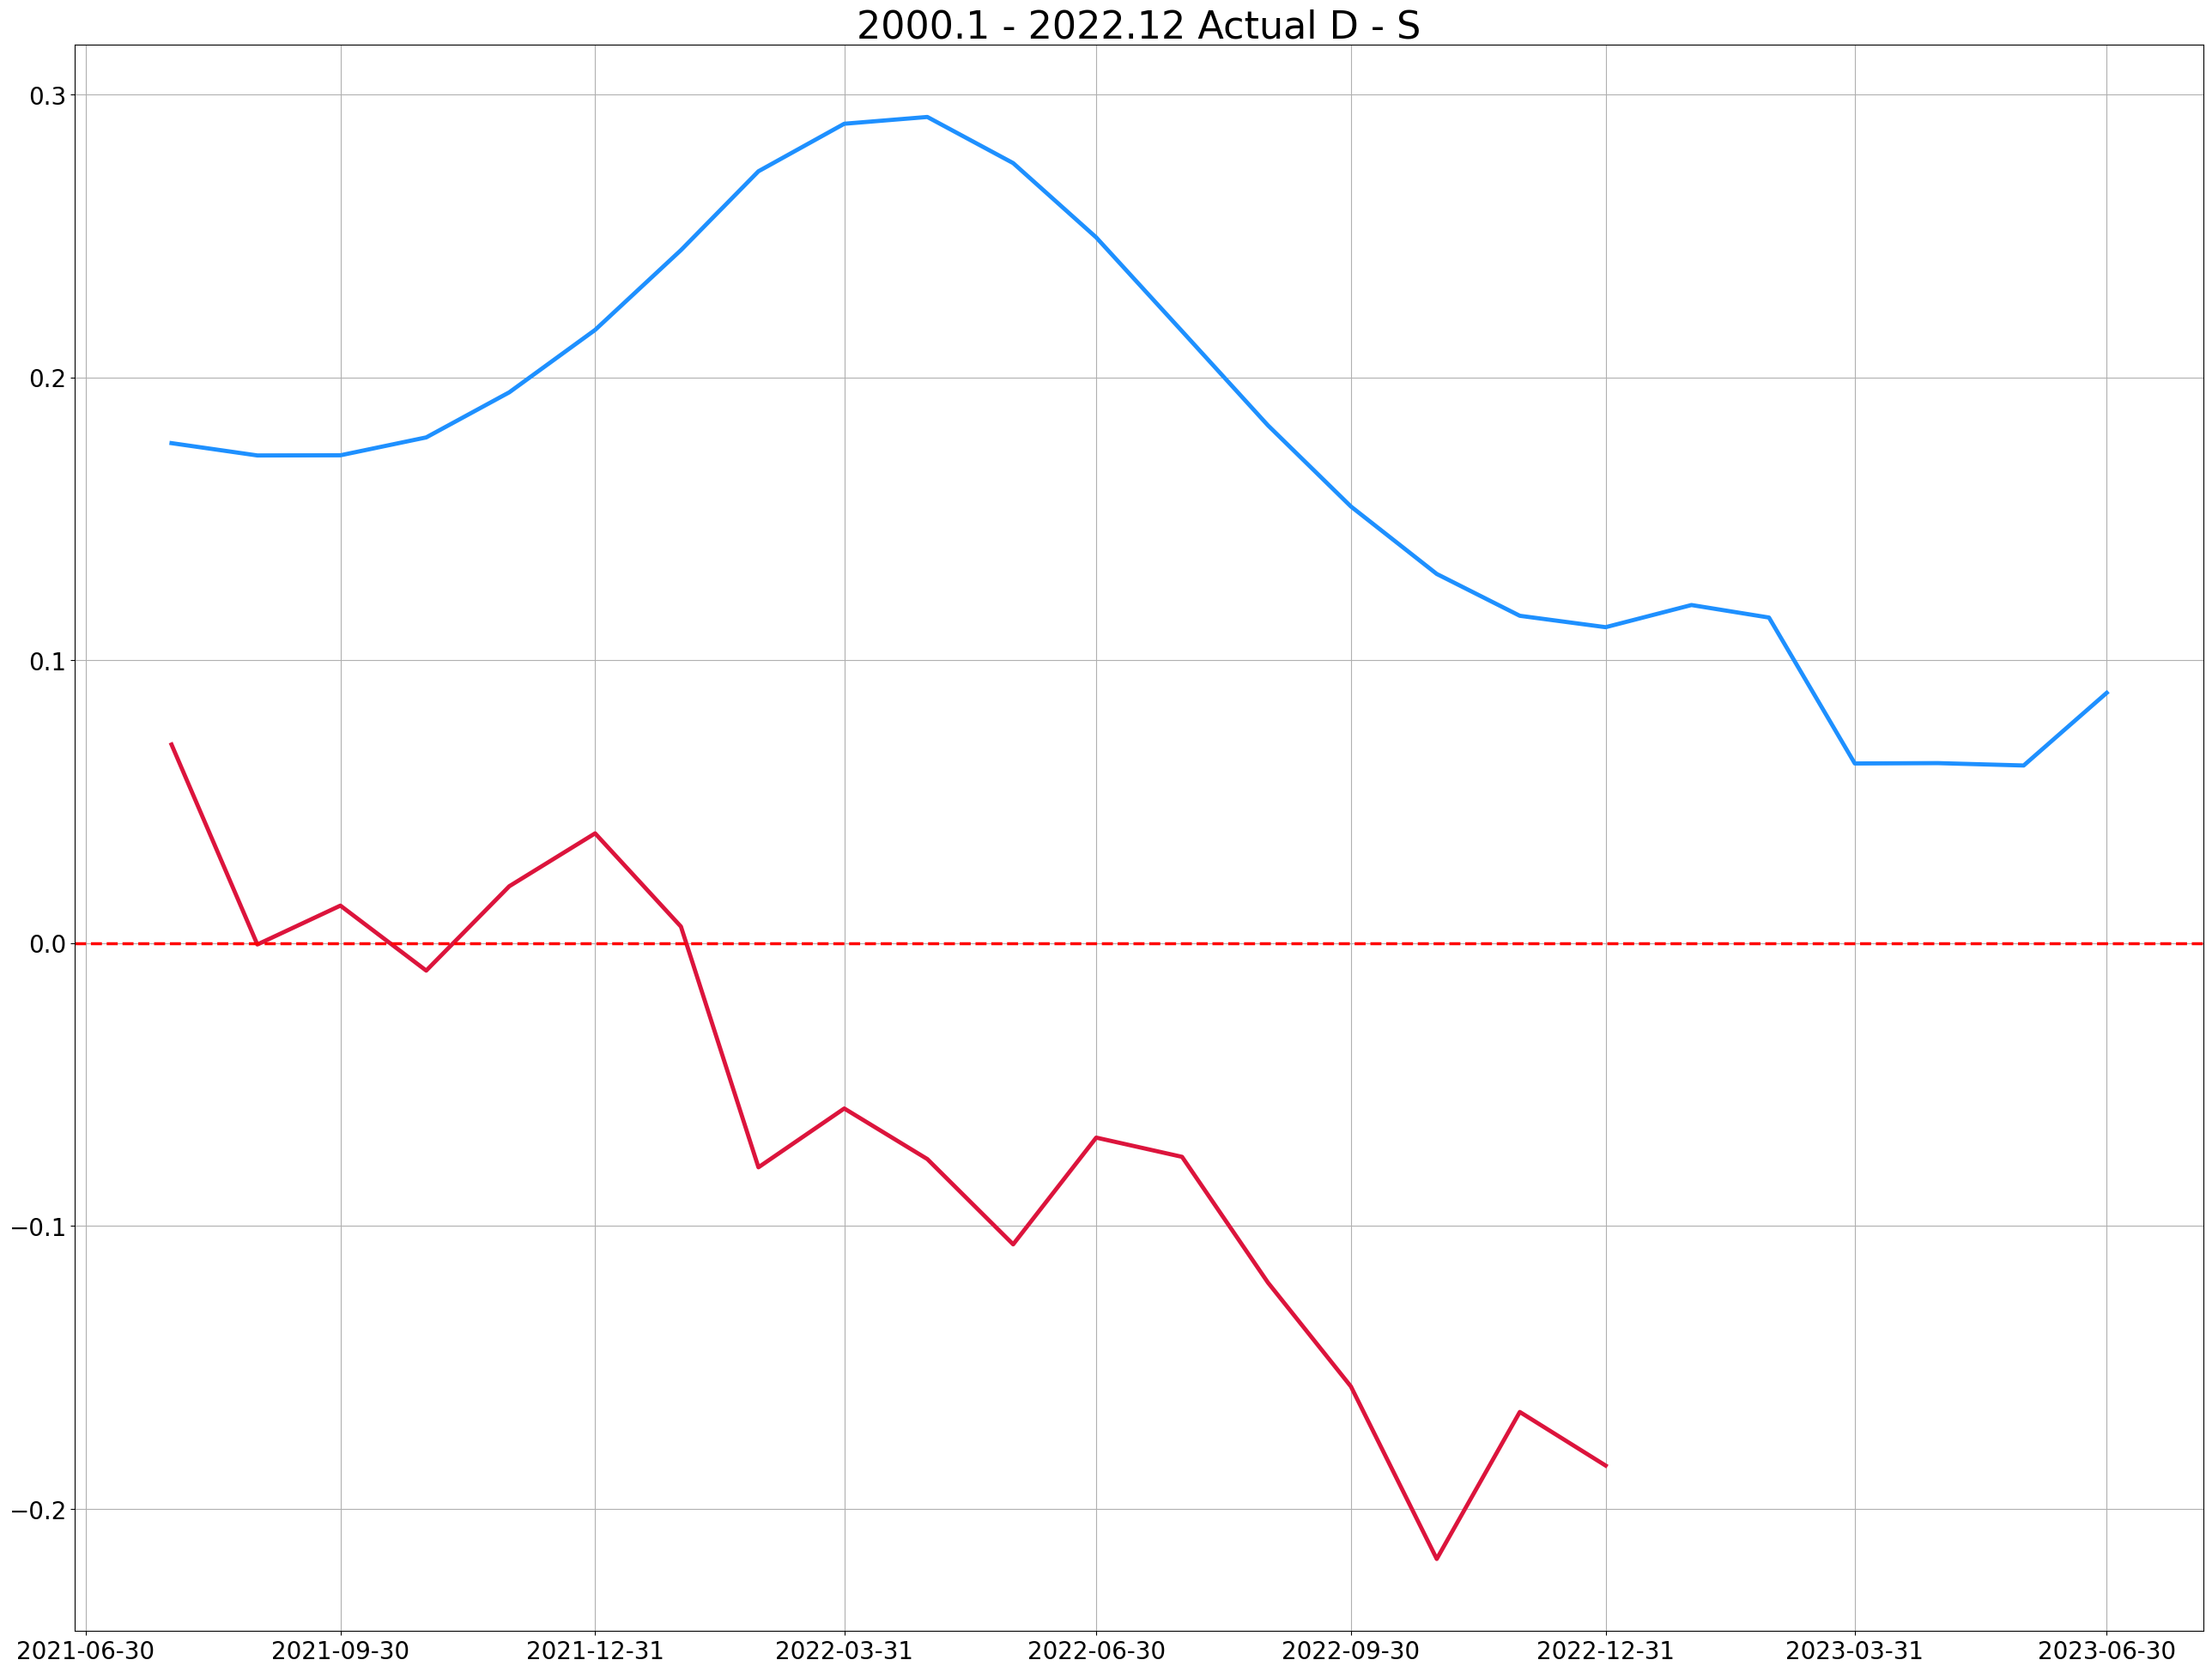

In [125]:
temp_ = pd.concat([구리수요[["PX_LAST_STD_EWM"]], 공급_[["PX_LAST_STD_EWM"]]], axis = 1)
temp_.columns = ["Demand", "Supply"]
temp_["D-S"] = temp_["Demand"] - temp_["Supply"]

plt.figure(figsize=(32,24))
plt.plot(temp[-24:].index, temp[-24:]["D-S"], color='dodgerblue', lw='3.5')
plt.plot(temp_[-18:].index , temp_[-18:]["D-S"],color='crimson', lw="3.5")
plt.axhline(0, color='red', ls="--", lw="2.5")
plt.grid()
plt.xticks(pd.date_range("2021-06-01", "2023-07-01", freq = "3M"),size=20)
plt.yticks(size=20)
plt.title("2000.1 - 2022.12 Actual D - S", size=32)

plt.show()